In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import seaborn as sns

import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/sample_submit.csv
../data/sumote_lightBGM1_0602.csv
../data/test.csv
../data/train.csv
../data/.ipynb_checkpoints\sample_submit-checkpoint.csv
../data/.ipynb_checkpoints\sumote_lightBGM1_0602-checkpoint.csv
../data/.ipynb_checkpoints\test-checkpoint.csv
../data/.ipynb_checkpoints\train-checkpoint.csv


In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_sub = pd.read_csv('../data/sample_submit.csv')

# set type label
train_df['type'] = 'train'
test_df['type'] = 'test'

# all data
all_df = pd.concat([train_df, test_df], axis=0)

## 特徴量の確認

In [3]:
print(train_df.columns.values)

['id' 'age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges' 'type']


In [4]:
print("***********train head***********")
print(train_df.head(5))
print("***********train tail***********")
print(train_df.tail(5))
print("***********test head***********")
print(test_df.head(2))
print("***********all head***********")
print(all_df.head(2))
print("***********all tail***********")
print(all_df.tail(2))

***********train head***********
   id  age     sex        bmi  children smoker     region  charges   type
0   0   26    male  32.665465         3     no  southeast        0  train
1   1   41    male  29.798725         1     no  southwest        0  train
2   2   28    male  32.722029         0    yes  northwest        1  train
3   3   20  female  38.429831         2     no  southeast        0  train
4   4   45  female  29.641854         1     no  northwest        0  train
***********train tail***********
        id  age     sex        bmi  children smoker     region  charges   type
1595  1994   52    male  32.772830         0     no  southwest        0  train
1596  1996   29    male  37.189564         0     no  northwest        0  train
1597  1997   56  female  43.281979         1     no  southeast        0  train
1598  1998   51    male  28.232308         1    yes  northwest        0  train
1599  1999   54  female  28.997113         0     no  northwest        0  train
***********test 

In [5]:
# データの型と欠損値の有無を確認
train_df.info()
# 重複の確認
print("重複データ数："+ str(train_df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1600 non-null   int64  
 1   age       1600 non-null   int64  
 2   sex       1600 non-null   object 
 3   bmi       1600 non-null   float64
 4   children  1600 non-null   int64  
 5   smoker    1600 non-null   object 
 6   region    1600 non-null   object 
 7   charges   1600 non-null   int64  
 8   type      1600 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 112.6+ KB
重複データ数：0


→　欠損値がなし

In [6]:
# 数値データの基本統計量
train_df.describe()
# カテゴリカルデータの基本統計量
train_df.describe(include='O')
# 上記二つの基本統計量
train_df.describe(include='all')

,id,age,sex,bmi,children,smoker,region,charges,type
count,1600.00000,1600.000000,1600,1600.000000,1600.000000,1600,1600,1600.000000,1600
unique,NaN,NaN,2,NaN,NaN,2,4,NaN,1
top,NaN,NaN,male,NaN,NaN,no,northeast,NaN,train
freq,NaN,NaN,841,NaN,NaN,1261,414,NaN,1600
mean,1007.86250,38.985000,NaN,32.424376,1.014375,NaN,NaN,0.306250,NaN
std,575.26841,13.555012,NaN,5.766915,1.259031,NaN,NaN,0.628656,NaN
min,0.00000,18.000000,NaN,20.627626,0.000000,NaN,NaN,0.000000,NaN
25%,515.75000,27.000000,NaN,28.634267,0.000000,NaN,NaN,0.000000,NaN
50%,1010.50000,40.000000,NaN,32.268786,1.000000,NaN,NaN,0.000000,NaN
75%,1509.25000,50.000000,NaN,37.069581,2.000000,NaN,NaN,0.000000,NaN


## 特徴量の可視化

<Axes: xlabel='charges', ylabel='count'>

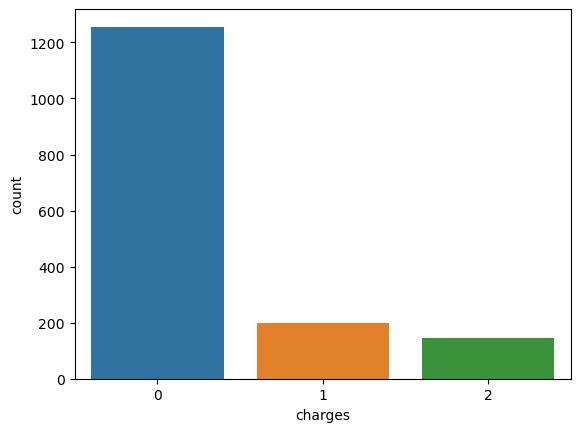

In [7]:
sns.countplot(x='charges', data=train_df) 

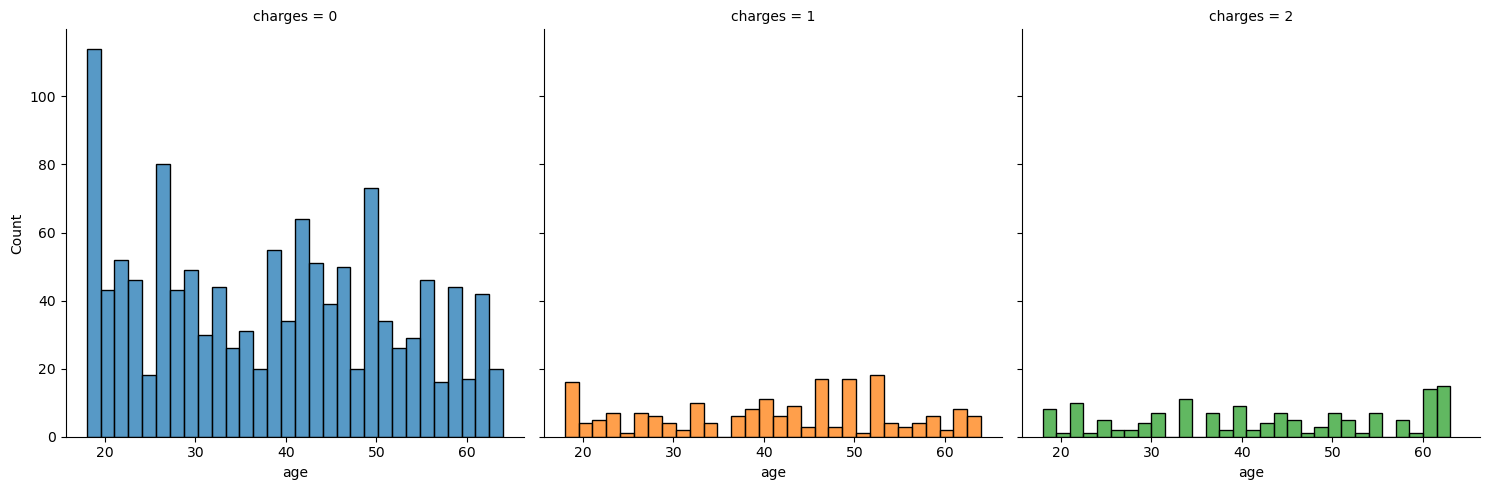

In [8]:
# ageについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'age', bins=30, kde=False)

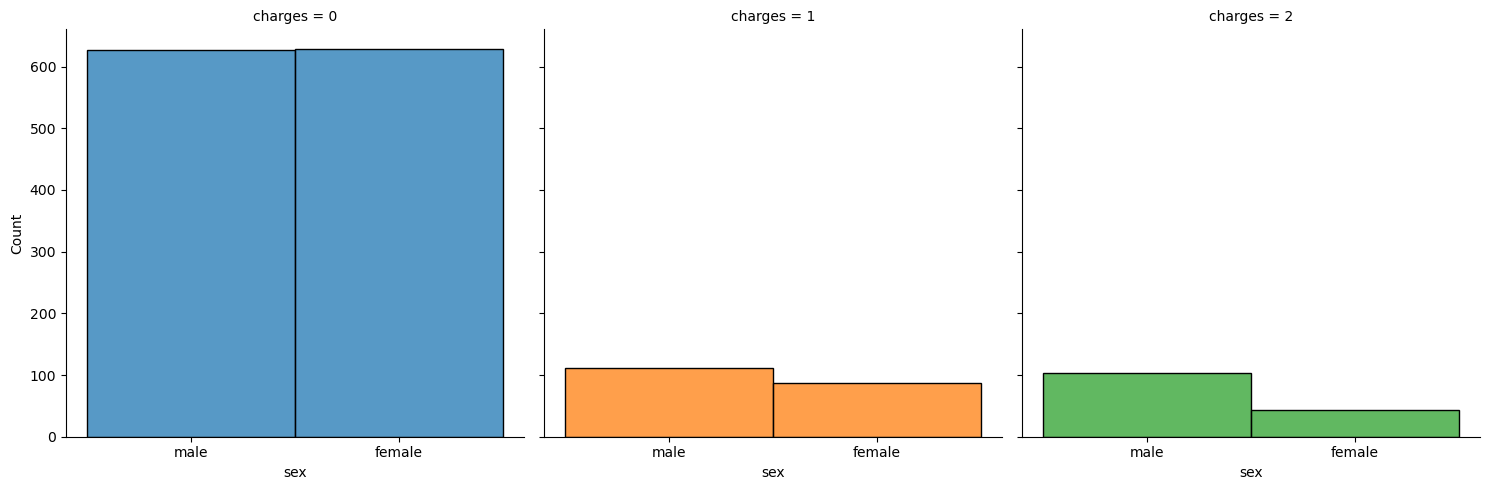

In [9]:
# sexについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'sex', bins=30, kde=False)

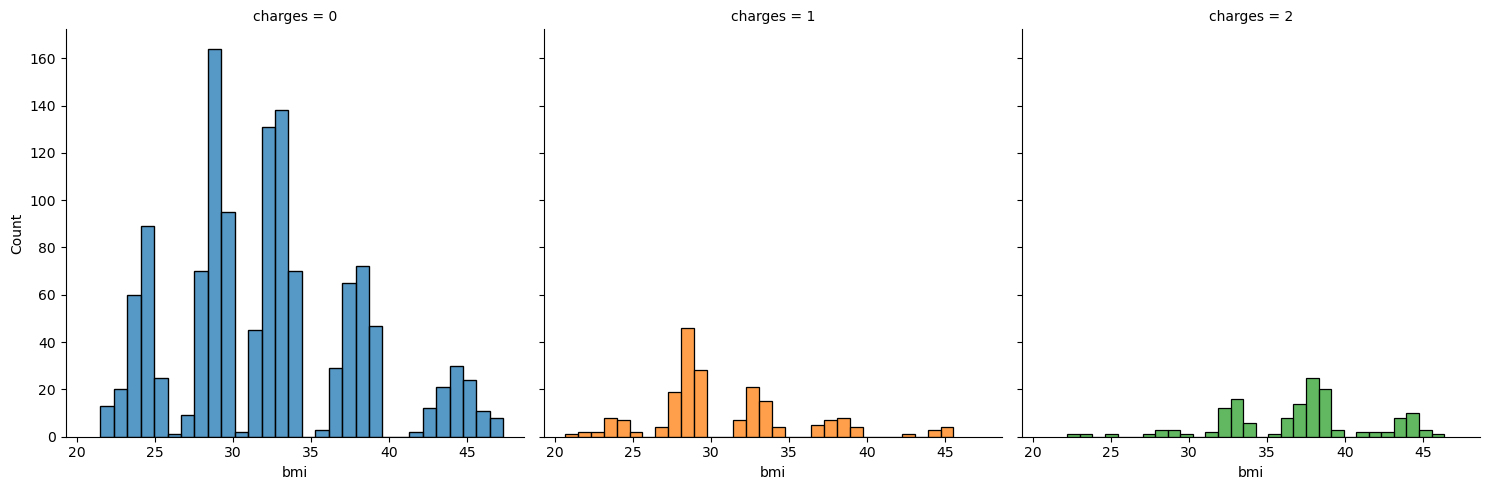

In [10]:
# bmiについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'bmi', bins=30, kde=False)

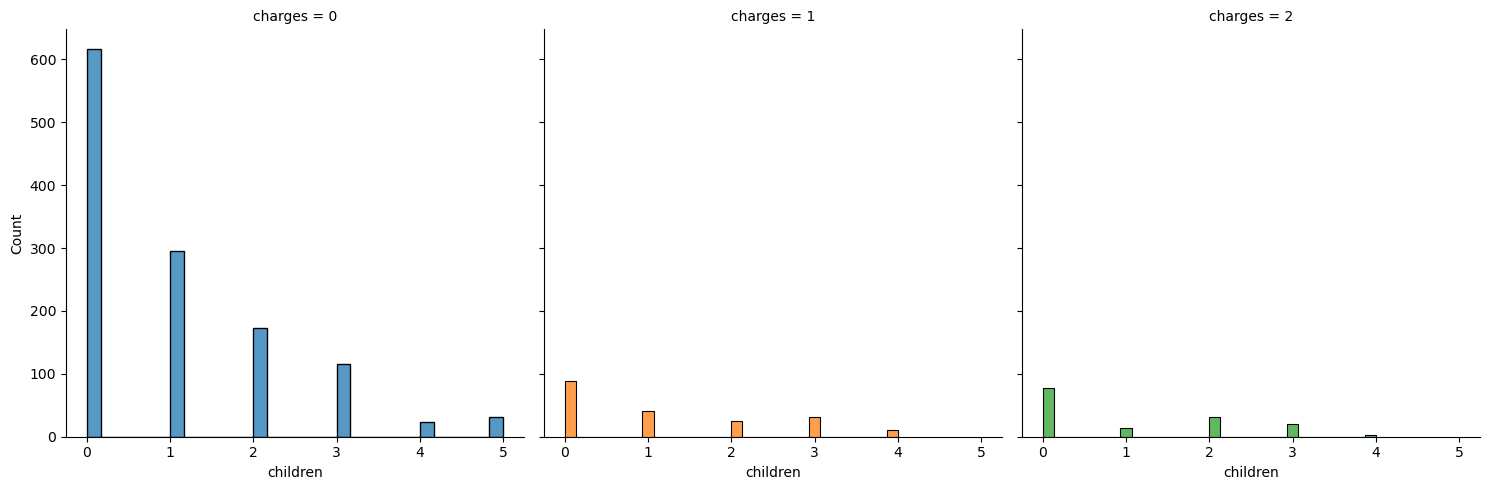

In [11]:
# childrenについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'children', bins=30, kde=False)

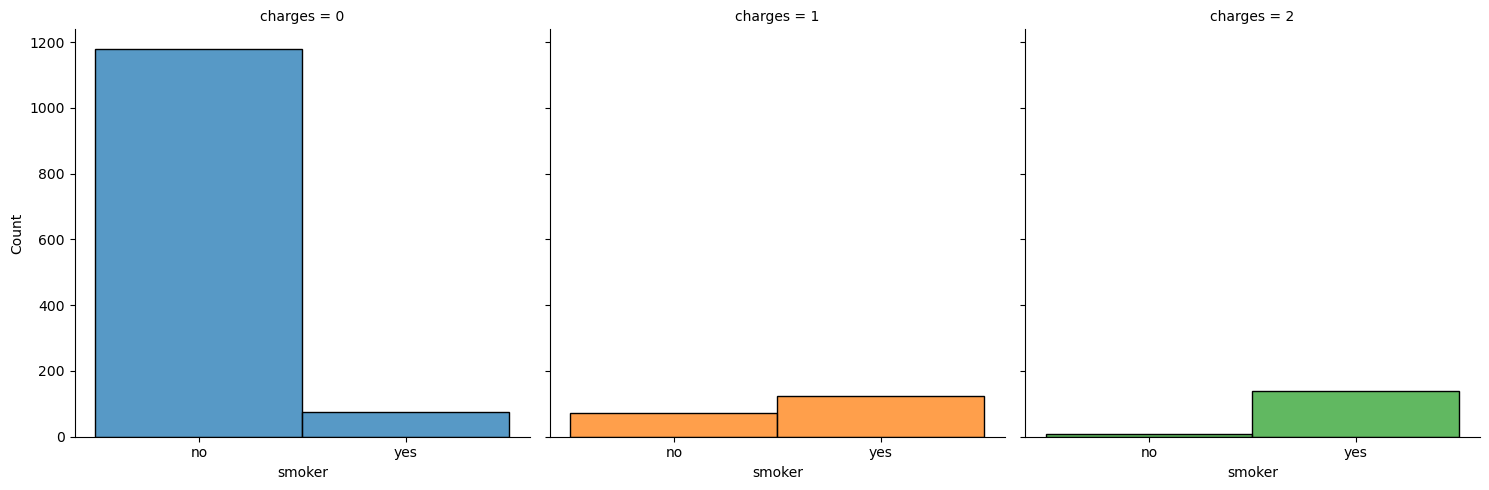

In [12]:
# smokerについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'smoker', bins=30, kde=False)

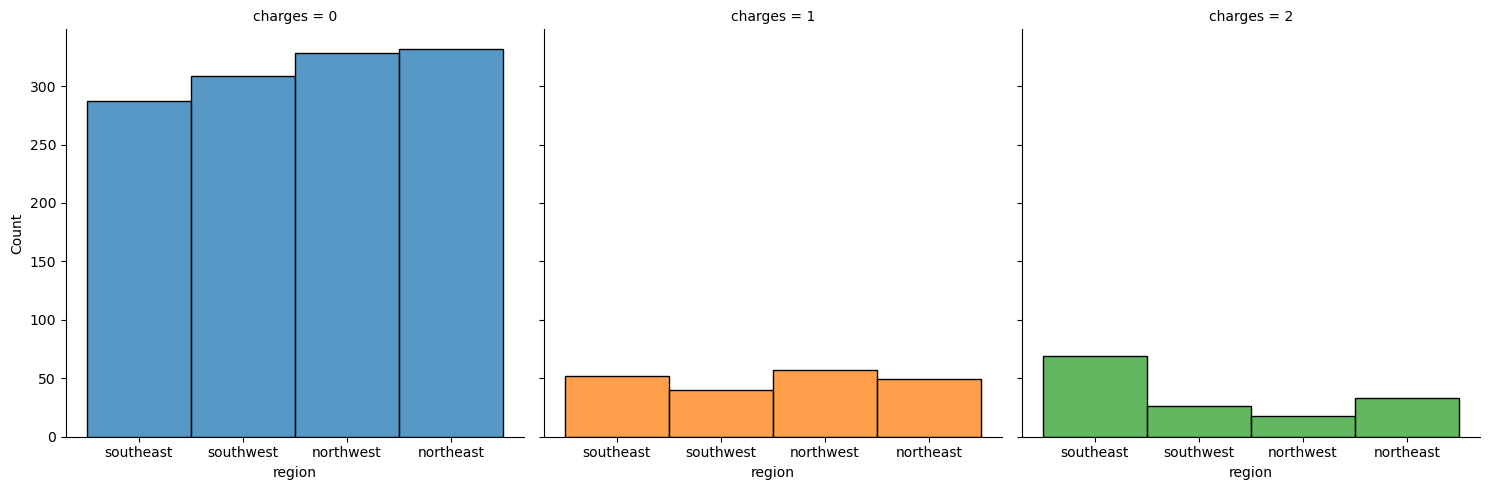

In [13]:
# regionについて可視化
fig = sns.FacetGrid(train_df, col='charges', hue='charges', height=5)
fig.map(sns.histplot, 'region', bins=30, kde=False)

### カテゴリカル変数の変換
→One-Hot Encoding

In [14]:
# カテゴリカル変数をOne-Hot_Encodingで変換
all_df = pd.get_dummies(all_df, columns=['sex', 'smoker', 'region'], drop_first=True)
print(all_df)

       id  age        bmi  children  charges   type  sex_male  smoker_yes  \
0       0   26  32.665465         3      0.0  train         1           0   
1       1   41  29.798725         1      0.0  train         1           0   
2       2   28  32.722029         0      1.0  train         1           1   
3       3   20  38.429831         2      0.0  train         0           0   
4       4   45  29.641854         1      0.0  train         0           0   
..    ...  ...        ...       ...      ...    ...       ...         ...   
395  1968   47  24.915980         1      NaN   test         0           0   
396  1972   18  44.752922         0      NaN   test         0           0   
397  1979   33  37.203015         0      NaN   test         0           1   
398  1983   29  33.617369         1      NaN   test         1           0   
399  1995   37  32.722320         3      NaN   test         0           0   

     region_northwest  region_southeast  region_southwest  
0              